# Введение в pytorch
### Барышев Михаил ИУ10-66, В - 5

In [6]:
import torch
import numpy as np
# numpy 

x = np.arange(16).reshape(4, 4)

print(f'X :\n {x}')
print(f'add 5 :\n {x + 5}')
print(f'X*X^T  :\n {np.dot(x, x.T)}')
print(f'mean over cols :\n {x.mean(axis=-1)}')
print(f'cumsum of cols :\n {np.cumsum(x, axis=0)}' )
# pytorch 

x = np.arange(16).reshape(4, 4)

x = torch.from_numpy(x).type(torch.FloatTensor) #or torch.arange(0,16).view(4,4)

print(f'X :\n {x}')
print(f'add 5 :\n {x + 5}')
print(f'X*X^T  :\n {torch.matmul(x, x.transpose(1, 0))}')
print(f'mean over cols :\n {torch.mean(x, dim=-1)}')
print(f'cumsum of cols :\n {torch.cumsum(x, dim=0)}')

X :
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
add 5 :
 [[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]
X*X^T  :
 [[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]
mean over cols :
 [ 1.5  5.5  9.5 13.5]
cumsum of cols :
 [[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]
X :
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
add 5 :
 tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T  :
 tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over cols :
 tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols :
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


## Пример линейной регрессии на датасете California

True True
True True
True False
True False
dL/dw = 
 tensor([214.0627])
dL/db = 
 tensor([-3.5852])
Non-Leaf x dL/dx = 
 None
Non-Leaf loss dL/dpred = 
 None


C:\Users\SeaDo\AppData\Local\Temp\ipykernel_12040\3639644662.py:38: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten\src\ATen/core/TensorBody.h:494.)
  print("Non-Leaf loss dL/dpred = \n", y_pred.grad)


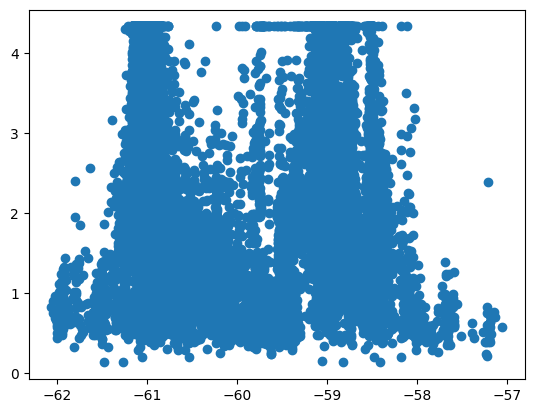

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

#select one column for simplicity. 
x = X[:, -1] / X[:, -1].std()
y = y / y.std()

plt.scatter(x, y);
# model tensors
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# data tensors
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# все тензоры являются leaf-tensors
# x и y не требуют вычисления градиентов
for vv in [w, b, x, y]:
    print(vv.is_leaf, vv.requires_grad)
#try out gradients
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)

loss.backward()

#now w.grad is a tensor containing gradient of L w.r.t. w

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

# no gradients for tensors with requires_grad=False
# and non-leaf tensors
print("Non-Leaf x dL/dx = \n", x.grad)
print("Non-Leaf loss dL/dpred = \n", y_pred.grad)

## Линейная регрессия

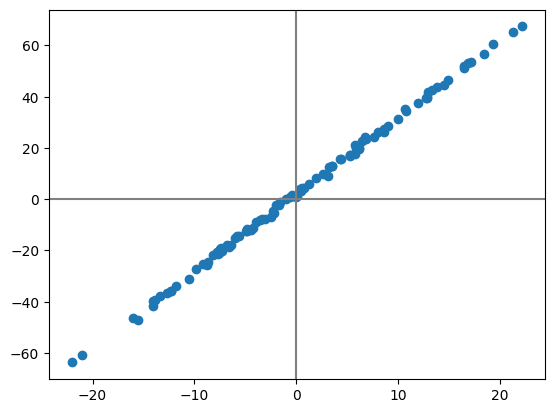

loss =  nan


In [8]:
import torch
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Generating some random data
torch.manual_seed(42)
x = torch.randn(100, 1) * 10
y = 3 * x + 2 + torch.randn(100, 1)

# Initialize weights and biases
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

alpha = 0.1  # learning rate

for i in range(100):
    # Compute loss
    y_pred = w * x + b
    loss = torch.mean((y_pred - y)**2)
    
    # Backpropagation
    loss.backward()
    
    # Gradient descent step for weights
    with torch.no_grad():
        w -= alpha * w.grad
        b -= alpha * b.grad
    
    # Zero gradients
    w.grad.zero_()
    b.grad.zero_()
    
    # Visualizing the progress
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), y_pred.data.numpy(), color='orange')
        plt.show()

        print("loss = ", loss.item())
        if loss.item() < 0.5:
            print("Done!")
            break


## Высокоуровневые API

При работе с нейронными сетями становится неудобно контролировать переменные с весами по-отдельности. Pytorch предоставляет высокоуровневый API для моделей http://pytorch.org/docs/master/nn.html#torch.nn.Module.

Чтобы воспользоваться моделью необходимо отнаследоваться от torch.nn.Module, определить слои и описать `forward`, `backward` будет вычислен автоматически.

Для демонстрации снова воспользуемся MNIST'ом.

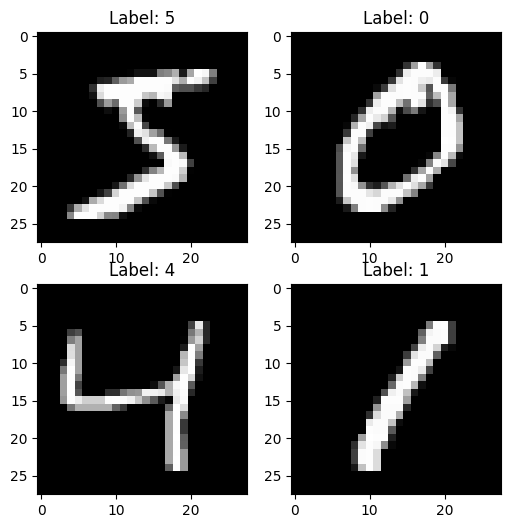

In [9]:
# MNIST 
from util import load_mnist
X_train, y_train, X_val, y_val, X_test, y_test = load_mnist(flatten=True)

plt.figure(figsize=[6, 6])
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.title(f"Label: {y_train[i]}")
    plt.imshow(X_train[i].reshape([28, 28]), cmap='gray');

In [10]:
# Higher-level API:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, hidden_size=40):
        super(Net, self).__init__()
        # here you construct weights for layers
        self.fc1 = nn.Linear(X_train.shape[1], hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 10)
        
    def forward(self, x):
        # here you describe usage of layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        # check log_softmax signature
        return F.log_softmax(x, dim=-1)
    # backward function computes automaticaly
    # model interface:
model = Net()
tt = torch.from_numpy(X_train[:10, :].astype(np.float32))
output = model(tt)

print('Model outputs: \n', output)
# TODO: получите вероятности из output c помощью функций из torch
# hint: см документацию к log_softmax
# Obtain probabilities using torch.exp, as log_softmax is the logarithm of softmax
probs = torch.exp(output)

# Obtain predictions by selecting the index of the maximum probability
pred = torch.argmax(probs, dim=1)

print('Probs: \n', probs)
print('Pred: \n', pred.data.numpy())

Model outputs: 
 tensor([[-2.2654, -2.3805, -2.1376, -2.1854, -2.4512, -2.3466, -2.2276, -2.2868,
         -2.4058, -2.3873],
        [-2.2324, -2.3759, -2.1517, -2.1725, -2.4819, -2.3609, -2.2167, -2.2894,
         -2.4208, -2.3799],
        [-2.2277, -2.3452, -2.1333, -2.2095, -2.4419, -2.3905, -2.2142, -2.3019,
         -2.4113, -2.4011],
        [-2.2845, -2.3540, -2.1418, -2.2146, -2.4700, -2.3619, -2.1728, -2.3062,
         -2.3479, -2.4230],
        [-2.1991, -2.3676, -2.1491, -2.2035, -2.4387, -2.3550, -2.2487, -2.2910,
         -2.4077, -2.4135],
        [-2.2137, -2.3720, -2.1448, -2.1912, -2.4615, -2.3633, -2.2258, -2.2852,
         -2.4273, -2.3957],
        [-2.2165, -2.3591, -2.1151, -2.2357, -2.4445, -2.3644, -2.2219, -2.2959,
         -2.4179, -2.4077],
        [-2.2066, -2.3600, -2.1520, -2.1998, -2.4420, -2.3848, -2.2287, -2.2869,
         -2.4399, -2.3760],
        [-2.2191, -2.3529, -2.1216, -2.2109, -2.4609, -2.3563, -2.2266, -2.3079,
         -2.4344, -2.3902],
  

  0%|          | 0/1562 [00:00<?, ?it/s]

  0%|          | 0/312 [00:00<?, ?it/s]

  0%|          | 0/1562 [00:00<?, ?it/s]

  0%|          | 0/312 [00:00<?, ?it/s]

  0%|          | 0/1562 [00:00<?, ?it/s]

  0%|          | 0/312 [00:00<?, ?it/s]

  0%|          | 0/1562 [00:00<?, ?it/s]

  0%|          | 0/312 [00:00<?, ?it/s]

  0%|          | 0/1562 [00:00<?, ?it/s]

  0%|          | 0/312 [00:00<?, ?it/s]

  0%|          | 0/1562 [00:00<?, ?it/s]

  0%|          | 0/312 [00:00<?, ?it/s]

  0%|          | 0/1562 [00:00<?, ?it/s]

  0%|          | 0/312 [00:00<?, ?it/s]

  0%|          | 0/1562 [00:00<?, ?it/s]

  0%|          | 0/312 [00:00<?, ?it/s]

  0%|          | 0/1562 [00:00<?, ?it/s]

  0%|          | 0/312 [00:00<?, ?it/s]

  0%|          | 0/1562 [00:00<?, ?it/s]

  0%|          | 0/312 [00:00<?, ?it/s]

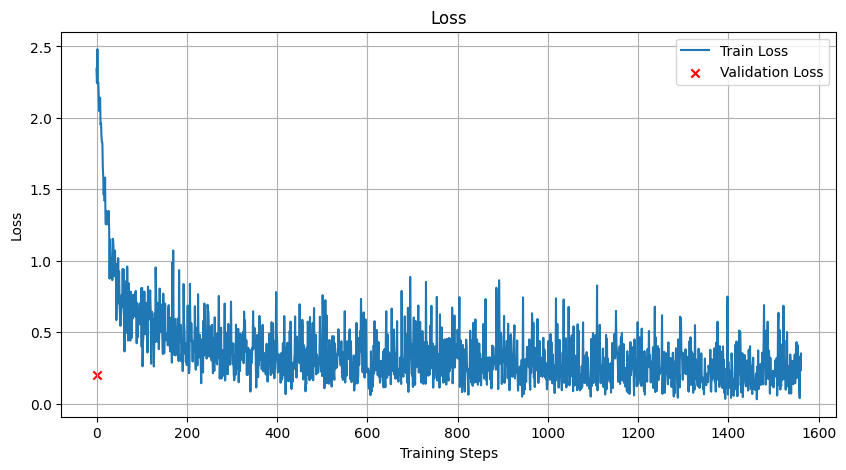

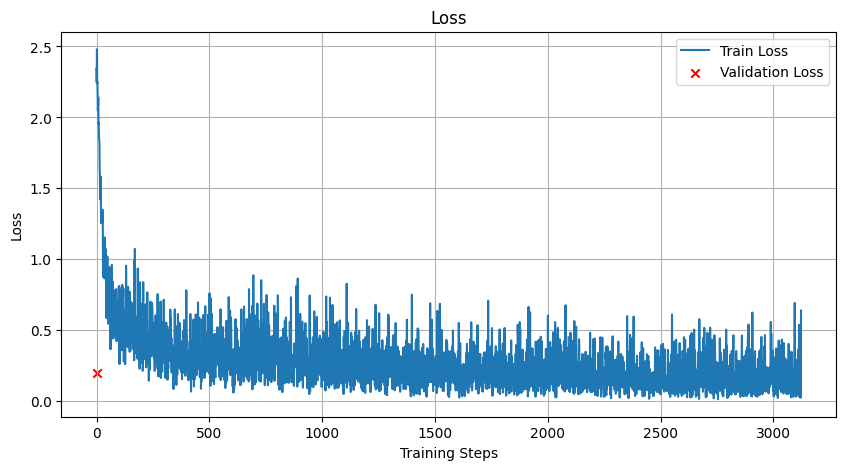

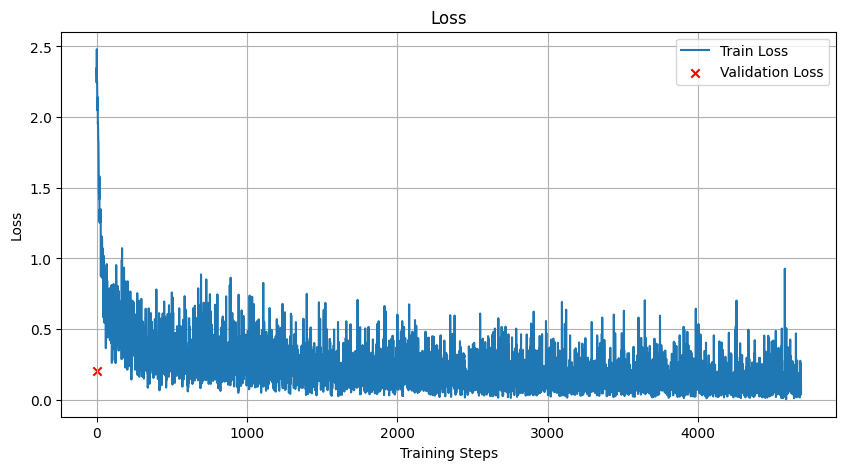

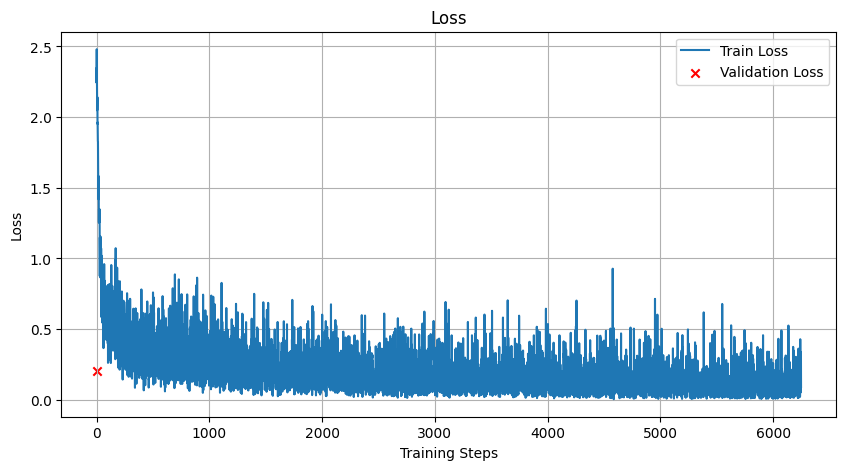

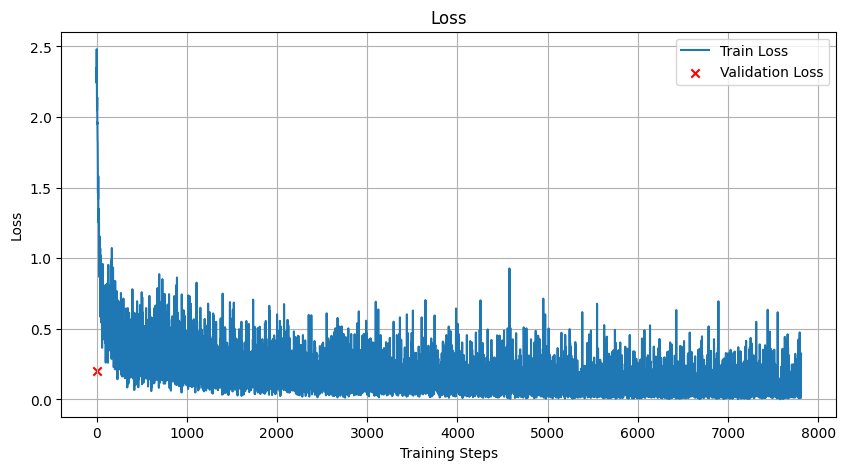

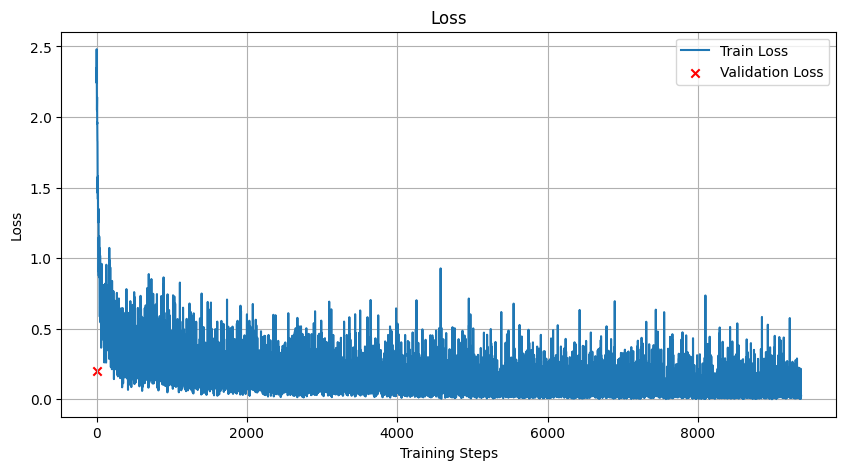

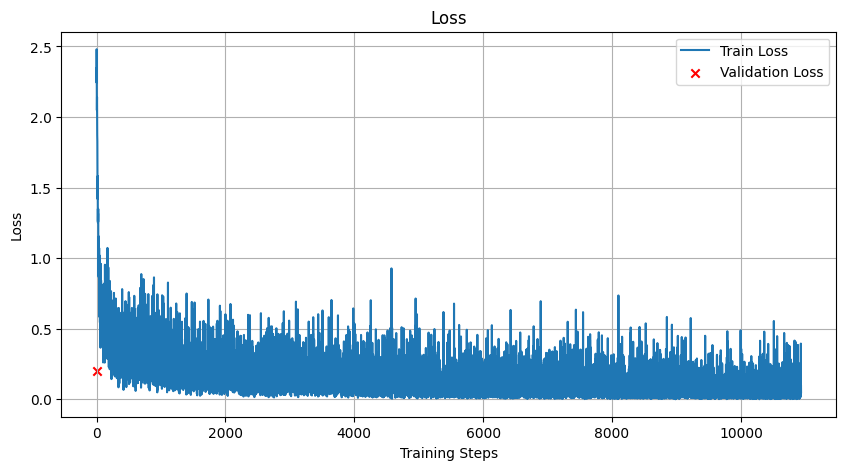

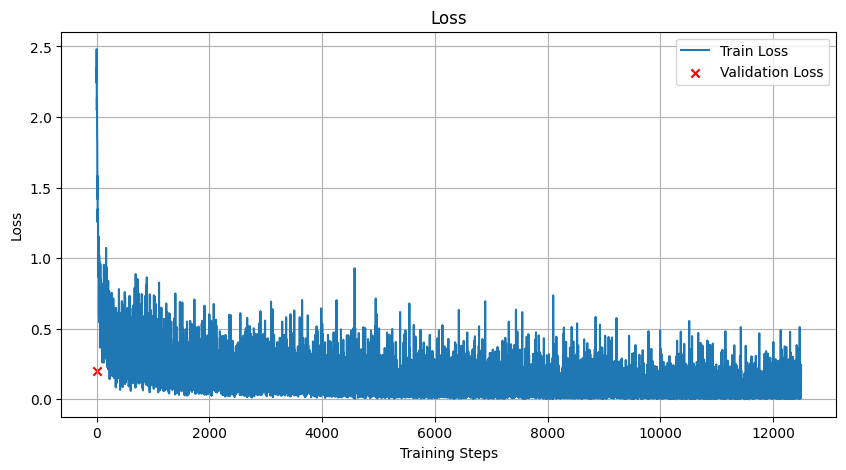

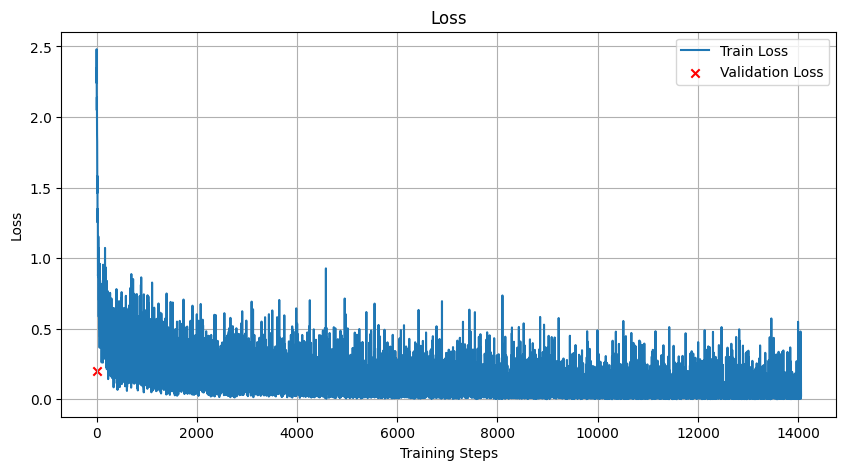

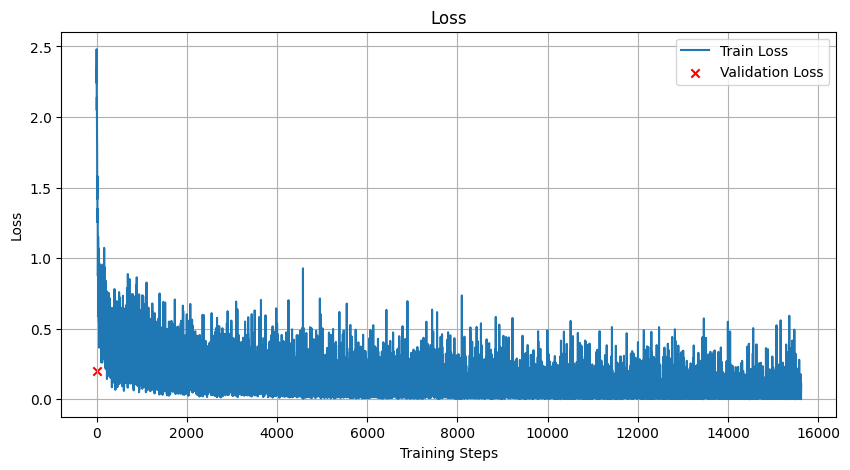

In [11]:
from util import load_mnist
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

X_train, y_train, X_val, y_val, X_test, y_test = load_mnist(flatten=True)
# Функция для создания итератора по мини-пакетам
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in tqdm(range(0, len(inputs) - batchsize + 1, batchsize)):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]
        
# Функция для обучения модели
def train(model, optimizer, batchsize=32):
    loss_log = []
    model.train()
    for x_batch, y_batch in iterate_minibatches(X_train, y_train, batchsize=batchsize, shuffle=True):
        # Подготовка данных
        data = torch.from_numpy(x_batch.astype(np.float32))
        target = torch.from_numpy(y_batch.astype(np.int64))

        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)

        # Расчет градиентов
        loss.backward()

        # Шаг оптимизации
        optimizer.step()
        loss = loss.item()
        loss_log.append(loss)
    return loss_log

# Функция для валидации модели на X_val, y_val
def test(model, batchsize=32):
    loss_log = []
    model.eval()
    with torch.no_grad():
        for x_val_batch, y_val_batch in iterate_minibatches(X_val, y_val, batchsize=batchsize, shuffle=False):
            # Подготовка данных
            data = torch.from_numpy(x_val_batch.astype(np.float32))
            target = torch.from_numpy(y_val_batch.astype(np.int64))

            # Прямой проход
            output = model(data)
            loss = F.nll_loss(output, target)

            # Запись потерь
            loss_log.append(loss.item())
    
    return loss_log

# Функция для построения графика истории обучения
def plot_history(train_history, val_history, title='Loss'):
    plt.figure(figsize=(10, 5))
    plt.plot(train_history, label='Train Loss')
    plt.scatter(range(0, len(train_history), len(train_history)//len(val_history)), val_history, marker='x', color='r', label='Validation Loss')
    plt.xlabel('Training Steps')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.grid(True)

# Создание модели
class Net(nn.Module):
    def __init__(self, hidden_size=40):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=-1)

# Создание модели и оптимизатора
model = Net()
opt = torch.optim.RMSprop(model.parameters(), lr=0.001)
batchsize = 32

# Цикл обучения
train_log = []
val_log = []

for epoch in range(10):
    train_loss = train(model, opt, batchsize=batchsize)
    train_log.extend(train_loss)
    
    val_loss = np.mean(test(model))
    val_log.append(val_loss)
        
    # Построение графика потерь обучения и валидации
    plot_history(train_log, val_log, title='Loss')



## Метрики

Logloss - величина, которую трудно интерпретировать. Для отслеживания тренировки и сравнения моделей удобнее наблюдать за интерпретируемыми метриками, например точностью (accuracy)

В машинном обучении и глубоком обучении термин "батч" относится к группе данных, которая передается модели одновременно для обработки. Обработка данных в батчах является часто используемой стратегией для обучения моделей, особенно при использовании методов градиентного спуска. Вместо того, чтобы передавать всю обучающую выборку модели одновременно, данные разделяются на более мелкие части, которые называются батчами, и каждый батч последовательно передается модели для вычисления потерь и обновления весов.

Размер батча - это количество образцов данных, передаваемых модели одновременно. Например, если размер батча равен 32, это означает, что 32 образца данных будут переданы модели за один раз.

Epoch 10
Train loss: 0.061888462815082854, Train accuracy: 0.9804737516005122
Val loss: [0.0278101097792387, 0.013462265022099018, 0.18865063786506653, 0.025661669671535492, 0.03889324888586998, 0.020592521876096725, 0.19157633185386658, 0.20426367223262787, 0.011974042281508446, 0.03608269989490509, 0.40685299038887024, 0.22315068542957306, 0.2605859637260437, 0.3347645699977875, 0.10771045833826065, 0.09066891670227051, 0.6877358555793762, 0.3482930660247803, 0.043081723153591156, 0.02275698073208332, 0.020279448479413986, 0.09620392322540283, 0.34973981976509094, 0.1491393744945526, 0.05551862344145775, 0.10684869438409805, 0.06745687127113342, 0.16319167613983154, 0.20284685492515564, 0.011274265125393867, 0.0032441182993352413, 0.013159501366317272, 0.050447989255189896, 0.014246227219700813, 0.02112284116446972, 0.007394182961434126, 0.014573459513485432, 0.05096679925918579, 0.04586751013994217, 0.15891337394714355, 0.3160044252872467, 0.13319188356399536, 0.10563378781080246, 0

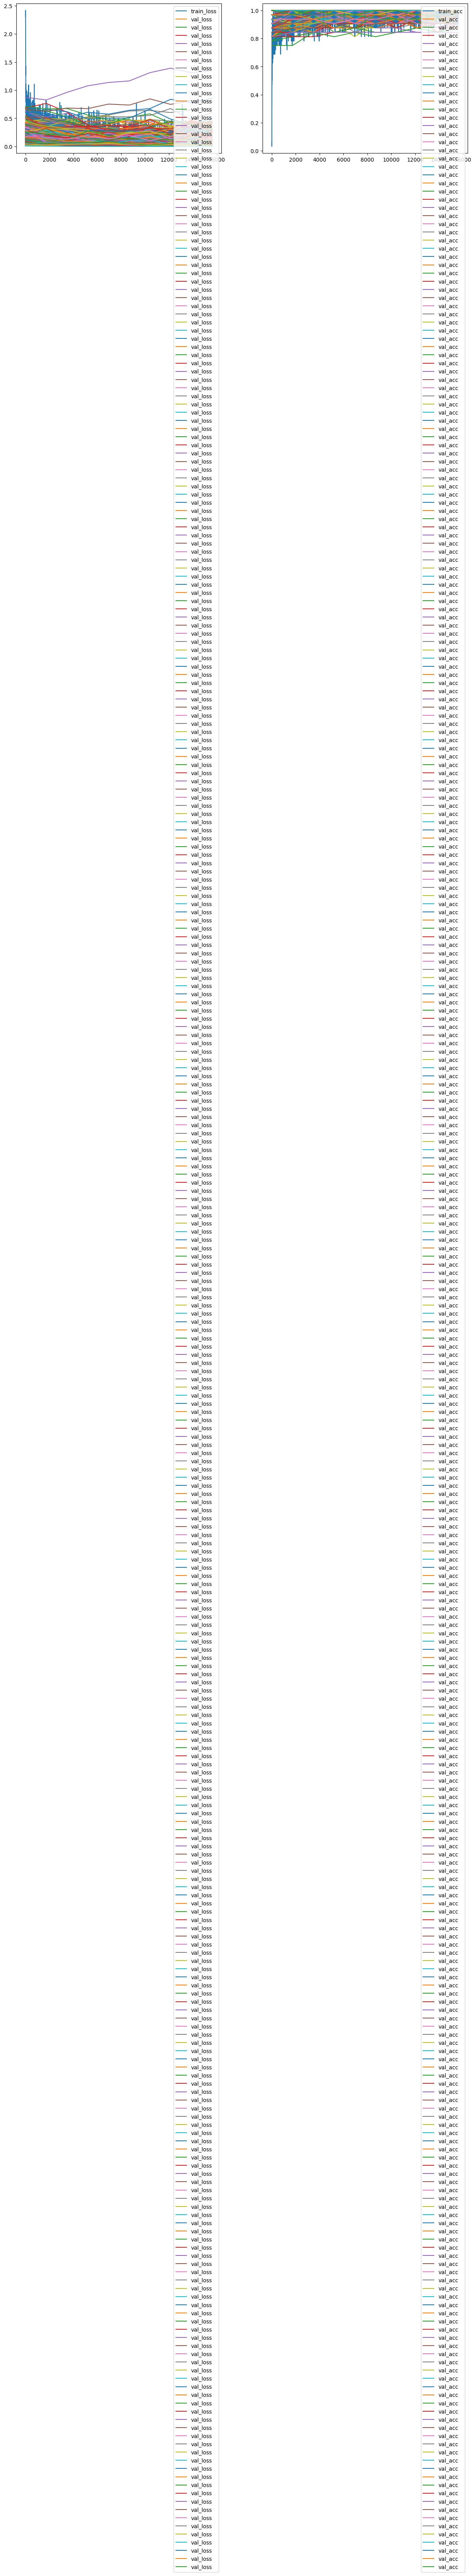

In [13]:
def train(model, optimizer, batchsize=32):
    loss_log, acc_log = [], []
    
    model.train()
    for x_batch, y_batch in iterate_minibatches(X_train, y_train, batchsize=batchsize, shuffle=True):
        data = torch.from_numpy(x_batch.astype(np.float32))
        target = torch.from_numpy(y_batch.astype(np.int64))
        
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
        preds = torch.argmax(output, dim=1)
        accuracy = torch.mean((preds == target).float())
        
        loss_log.append(loss.item())
        acc_log.append(accuracy.item())
    
    return loss_log, acc_log


def test(model):
    loss_log, acc_log = [], []
    
    model.eval()
    with torch.no_grad():
        for x_batch, y_batch in iterate_minibatches(X_val, y_val, batchsize=32, shuffle=False):
            data = torch.from_numpy(x_batch.astype(np.float32))
            target = torch.from_numpy(y_batch.astype(np.int64))
            
            output = model(data)
            loss = F.nll_loss(output, target)
            
            preds = torch.argmax(output, dim=1)
            accuracy = torch.mean((preds == target).float())
            
            loss_log.append(loss.item())
            acc_log.append(accuracy.item())
    
    return loss_log, acc_log



def plot_history(loss_log, acc_log, val_loss_log, val_acc_log):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(loss_log, label='train_loss')
    plt.plot(np.linspace(0, len(loss_log), len(val_loss_log)), val_loss_log, label='val_loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(acc_log, label='train_acc')
    plt.plot(np.linspace(0, len(acc_log), len(val_acc_log)), val_acc_log, label='val_acc')
    plt.legend()
    
    plt.show()


train_log, train_acc_log = [], []
val_log, val_acc_log = [], []

model = Net()
opt = torch.optim.RMSprop(model.parameters(), lr=0.001)
batchsize = 32


for epoch in range(10):
    train_loss, train_acc = train(model, opt, batchsize=batchsize)
    val_loss, val_acc = test(model)
    
    train_log.extend(train_loss)
    train_acc_log.extend(train_acc)
    val_log.append(val_loss)
    val_acc_log.append(val_acc)
    
    clear_output(wait=True)
    print(f"Epoch {epoch+1}")
    print(f"Train loss: {np.mean(train_loss)}, Train accuracy: {np.mean(train_acc)}")
    print(f"Val loss: {val_loss}, Val accuracy: {val_acc}")
    plot_history(train_log, train_acc_log, val_log, val_acc_log)

## Пример использования загрузчика данных:

In [14]:
%matplotlib inline

import time
import os

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

from torchvision import datasets, models, transforms
from torch.optim import lr_scheduler


data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

use_gpu = torch.cuda.is_available()
plt.ion()

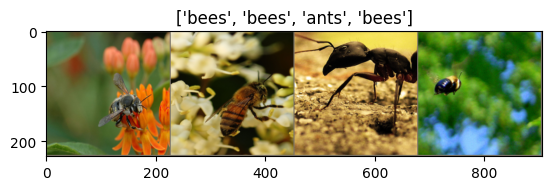

In [15]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.1)  # сделаем небольшую паузу, чтобы графики обновились


# Получим пакет обучающих данных
inputs, classes = next(iter(dataloaders['train']))

# Сделаем сетку из пакета
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [17]:
# обратим внимание на сохранение лучшей версии весов сети
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Каждая эпоха имеет этап обучения и валидации
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train(True)  # Переведем модель в режим обучения
            else:
                model.train(False)  # Установим модель для оценки модели

            running_loss = 0.0
            running_corrects = 0

            # Выполним итерацию по данным.
            for data in dataloaders[phase]:
                # получим исходные данные
                inputs, labels = data

                if use_gpu:
                    inputs = inputs.cuda()
                    labels = labels.cuda()

                # обнулим градиенты параметров
                optimizer.zero_grad()

                # вперед
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                # обратная оптимизация + только в том случае, если она находится на этапе обучения
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # статистика
                running_loss += loss.item()
                running_corrects += torch.sum(preds == labels).type(torch.float)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # глубокое копирование модели
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()
        
        time_elapsed = time.time() - since
        print('Elapsed {:.0f}m {:.0f}s\n'.format(time_elapsed // 60, time_elapsed % 60))

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # загрузим лучшие веса моделей
    model.load_state_dict(best_model_wts)
    return model

# torchvision содержит ряд моделей с претрейненными весами:
[m for m in dir(models) if not m.startswith('_')]

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [18]:
model_ft = models.resnet18(pretrained=True)
# hint: вы можете изучить устройство любого объекта в python пользуясь интерактивностью интерпретатора и методом dir()

# Список слоев модели можно получить с помощью обхода
# for x in model_ft.named_modules():
#    print(x[0], x[1])

# TODO: подмените в модели последний слой, чтобы она работала для двух классов

num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)



# TODO: выберите, какие параметры дообучать. Результат получается лучше если дообучать всё или только последний слой? Почему?
# например, выключить обучение всех параметров можно при помощи этого кода:
for params in model_ft.parameters():
    params.requires_grad = True 

params_to_train = model_ft.fc.parameters()

# используем графический процессор, если он у нас есть
if use_gpu:
    model_ft = model_ft.cuda()

# потеря
criterion = nn.CrossEntropyLoss()

# Создадим оптимизатор по выбранным параметрам
optimizer_ft = optim.SGD(params_to_train, lr=0.001, momentum=0.9)

# Уменьшение LR в 0,1 раза каждые 7 эпох
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

model_ft = train_model(
    model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)
# если всё сделано правильно, то точность на валидации должна быть больше 94%

C:\Users\SeaDo\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\SeaDo\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\SeaDo/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|█████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:25<00:00, 1.81MB/s]
C:\Users\SeaDo\miniconda3\lib\site-packages\torch\optim\lr_scheduler.py:143: UserWarning: Detected call of 

Epoch 0/24
----------
train Loss: 0.1626 Acc: 0.5902
val Loss: 0.0845 Acc: 0.8235
Elapsed 0m 22s

Epoch 1/24
----------
train Loss: 0.1255 Acc: 0.7664
val Loss: 0.0636 Acc: 0.8889
Elapsed 0m 47s

Epoch 2/24
----------
train Loss: 0.1157 Acc: 0.7992
val Loss: 0.0543 Acc: 0.9085
Elapsed 1m 10s

Epoch 3/24
----------
train Loss: 0.1011 Acc: 0.8402
val Loss: 0.0737 Acc: 0.8889
Elapsed 1m 32s

Epoch 4/24
----------
train Loss: 0.0934 Acc: 0.8566
val Loss: 0.0499 Acc: 0.9346
Elapsed 1m 55s

Epoch 5/24
----------
train Loss: 0.0952 Acc: 0.8525
val Loss: 0.0398 Acc: 0.9477
Elapsed 2m 18s

Epoch 6/24
----------
train Loss: 0.0707 Acc: 0.8811
val Loss: 0.0457 Acc: 0.9412
Elapsed 2m 42s

Epoch 7/24
----------
train Loss: 0.0967 Acc: 0.8361
val Loss: 0.0440 Acc: 0.9542
Elapsed 3m 6s

Epoch 8/24
----------
train Loss: 0.0918 Acc: 0.8279
val Loss: 0.0488 Acc: 0.9477
Elapsed 3m 29s

Epoch 9/24
----------
train Loss: 0.1044 Acc: 0.8320
val Loss: 0.0401 Acc: 0.9542
Elapsed 3m 52s

Epoch 10/24
---------

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


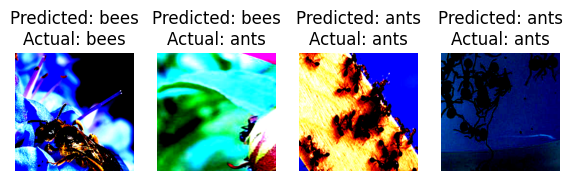

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


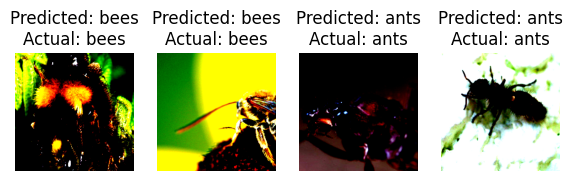

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


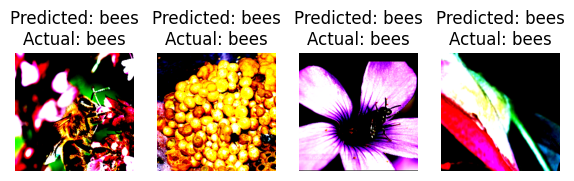

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


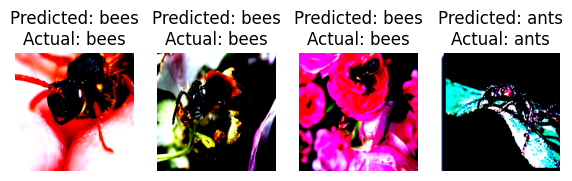

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


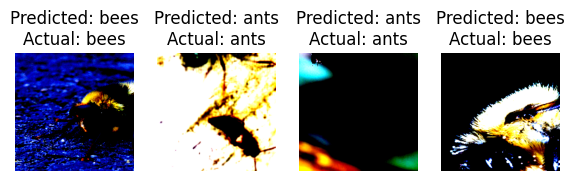

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


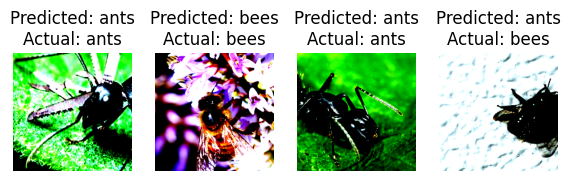

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


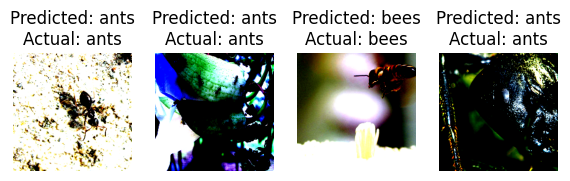

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


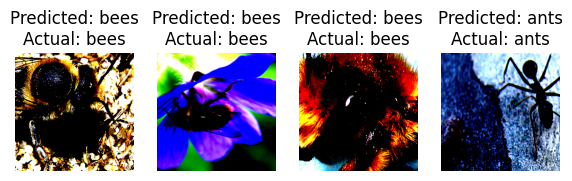

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


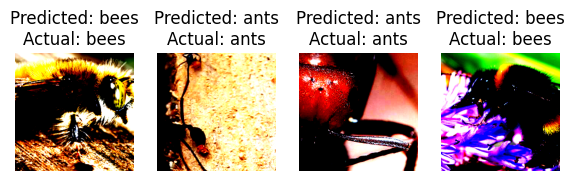

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


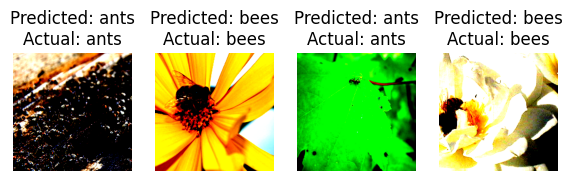

In [19]:
# TODO: напишим функцию, прогоняющую модель на нескольких примерах из валидационной выборки
# Отобразим картинки и предсказания

def visualize(model, dataloader, num_images=10):
    model.eval()
    class_names = dataloader.dataset.classes
    
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloader):
            if i >= num_images:
                break
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            fig = plt.figure(figsize=(18, 6))
            for j in range(inputs.size(0)):
                plt.subplot(1, num_images, j+1)
                plt.imshow(inputs.cpu().data[j].numpy().transpose((1, 2, 0)))
                plt.title(f'Predicted: {class_names[preds[j]]}\nActual: {class_names[labels[j].item()]}')
                plt.axis('off')
                
            plt.show()
            
visualize(model_ft, dataloaders['train'])